# Housing Prices Competition for Kaggle Learn Users

This is the notebook of submission to Kaggle's competition [Housing Prices Competition for Kaggle Learn Users](https://www.kaggle.com/c/home-data-for-ml-course/)! <br>
Let's have fun!

## Table of contents
1. [Set up](#Setup)
2. [Visualize the data](#dataviz)
3. [Handle missing values](#handle_missing_values)
4. [Feature engineering](#feature_engineering)
5. [Features selection](#feature_selection)
6. [Modeling](#modeling)
7. [Hyperparameters tuning](#hyperparameters_tuning)
8. [Final predictions & submission](#submission)

## Set up <a name="setup"><a/>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (8, 5)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 150)

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


In [3]:
df_train = pd.read_csv("/kaggle/input/home-data-for-ml-course/train.csv")
df_test = pd.read_csv("/kaggle/input/home-data-for-ml-course/test.csv")

df_all = pd.concat([df_train, df_test], ignore_index=True)
df_all.drop("SalePrice", axis=1, inplace=True)

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train.shape, df_test.shape

((1460, 81), (1459, 80))

## Visualize the data <a name="dataviz"><a/>
(for outliers detection)

In [6]:
num_cols = df_train.select_dtypes(include="number").columns.to_list()
cat_cols = df_train.select_dtypes(exclude="number").columns.to_list()

### Numeric columns

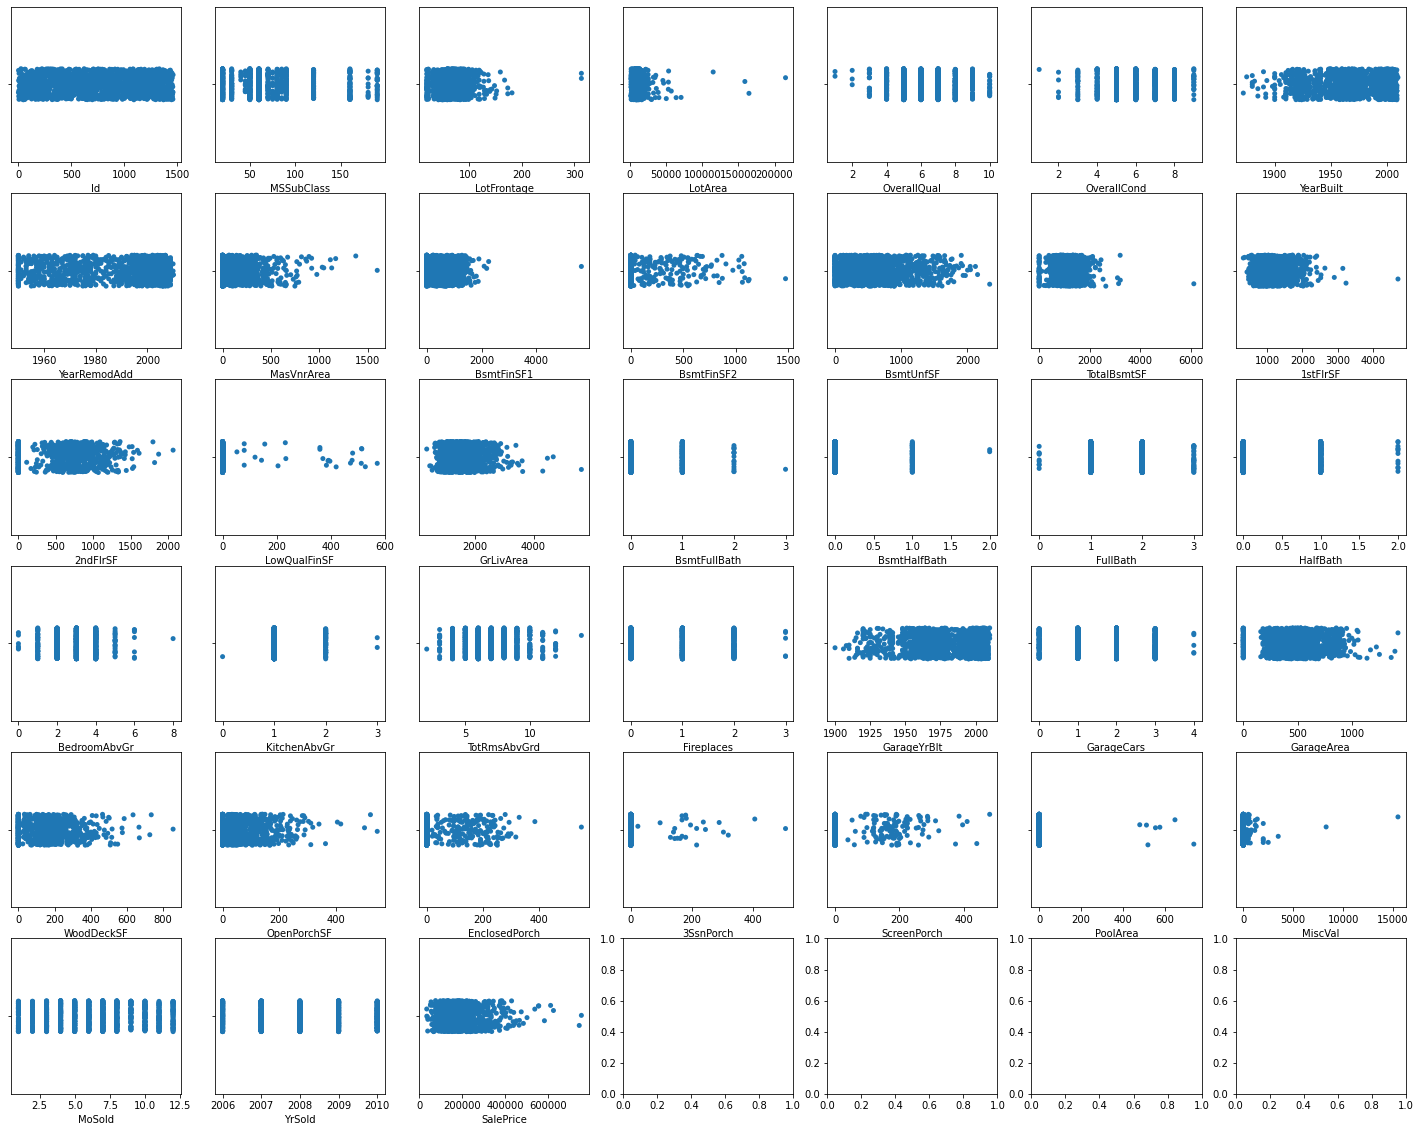

In [7]:
fig, ax = plt.subplots(6, 7, figsize=(25, 20))
ax = ax.flatten()

for i, col in enumerate(num_cols):
    sns.stripplot(x=df_train[col], ax=ax[i])

Some values are a bit off from the others like the one in BsmtFinSF1, but to me they are not outliers, they are still possible values. I'll keep them

### Categorical columns

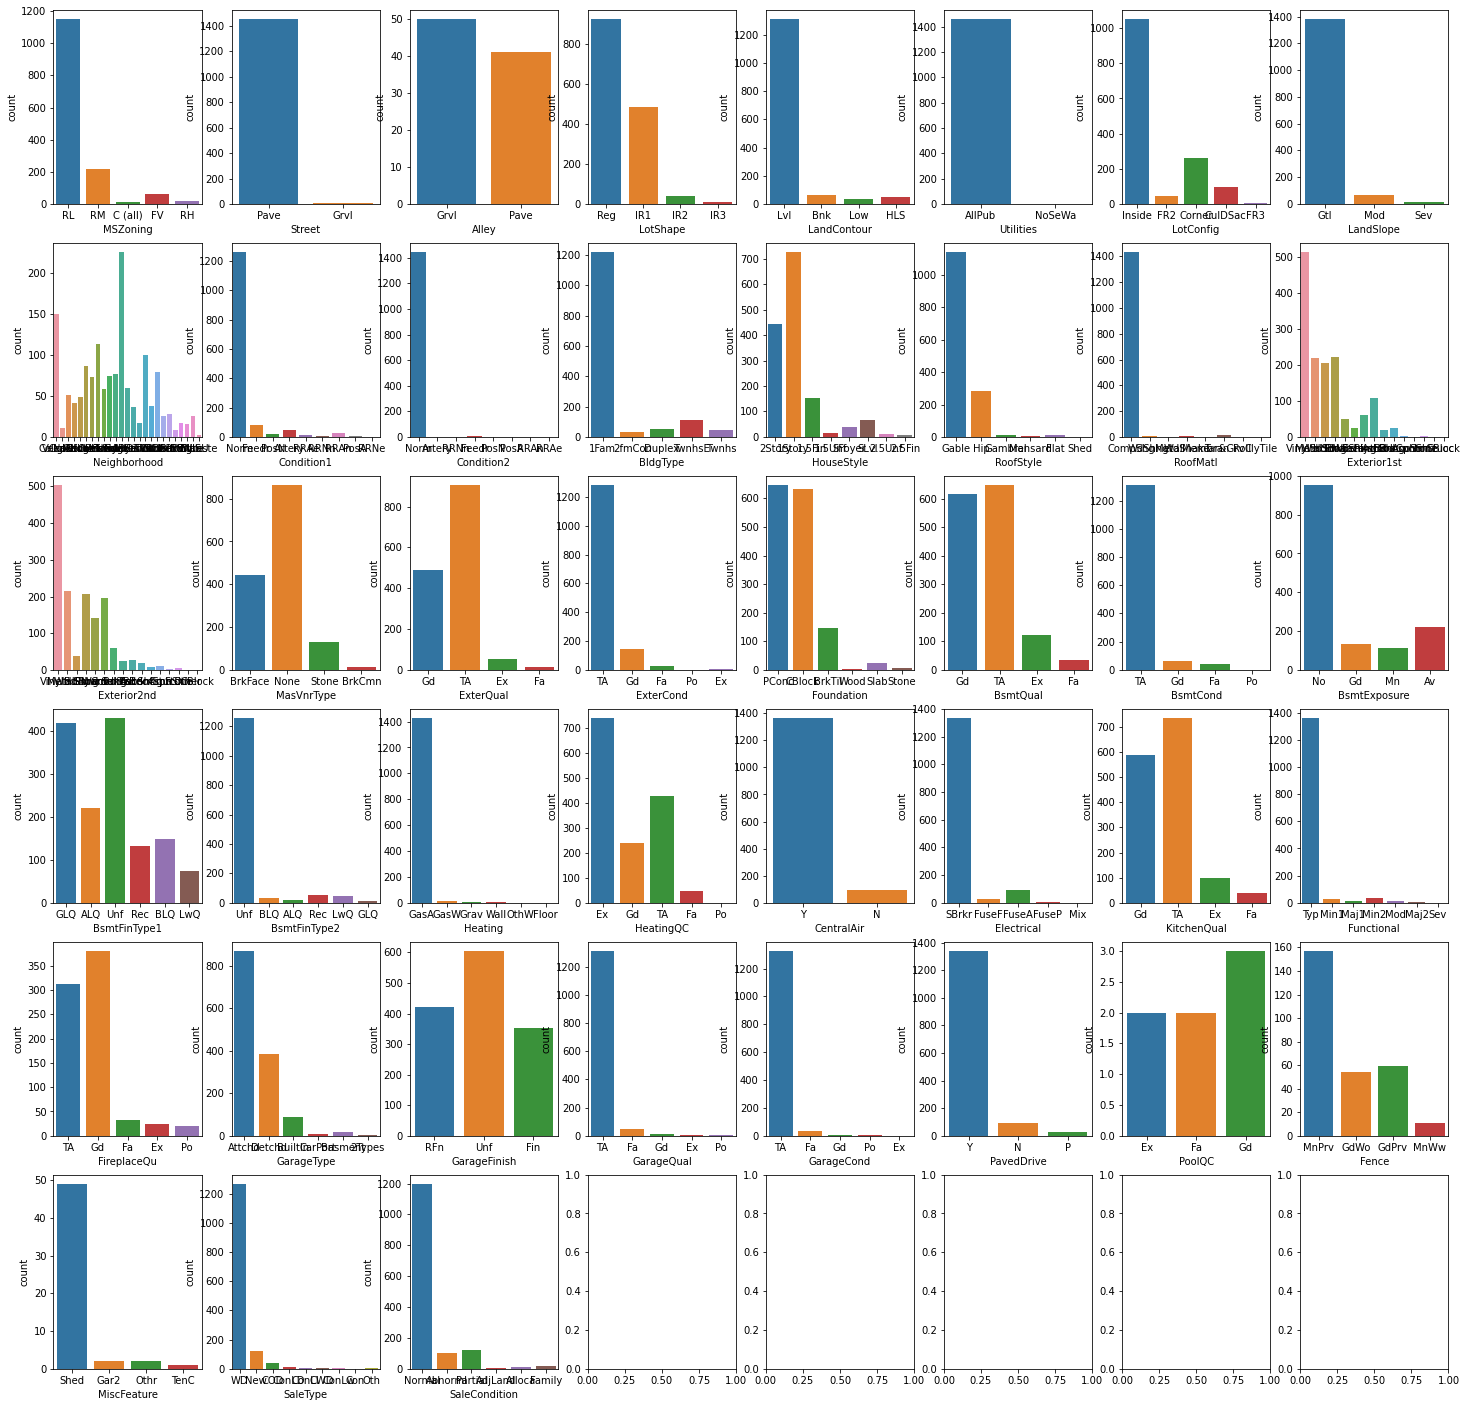

In [8]:
fig, ax = plt.subplots(6, 8, figsize=(25, 25))
ax = ax.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df_train, ax=ax[i])

It's hard to see if there are outliers right now. Let's use `value_counts()` for each column to see if weird values appear 

In [9]:
for col in cat_cols[:3]:  # I just do the first 3 columns here to avoir cluttering the notebook
    print(col)
    print(df_train[col].value_counts(dropna=False))
    print()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Street
Pave    1454
Grvl       6
Name: Street, dtype: int64

Alley
NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64



I looked every single categorical columns. It seems there is not weird values/categories within each column.  
However there are a lot of missing values!

## Handle missing values <a name="handle_missing_values"><a/>
(within df_all (train + test))

In [10]:
df_all.shape

(2919, 80)

In [11]:
missing_values = df_all.isna().sum()[df_all.isna().sum() > 0].sort_values(ascending=False).to_frame("count")
missing_values["frequency"] = missing_values["count"] / df_all.shape[0]
missing_values

,count,frequency
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageFinish,159,0.054471
GarageQual,159,0.054471
GarageCond,159,0.054471
GarageYrBlt,159,0.054471


Some columns contains a lot of missing values (more than 99% for PoolQC for instance). But if you look at the data_description.txt, you'll notice that some NaN values actually mean an absence of something. For exemple NA in PoolQC means "No Pool". It means that we should not remove those NaN values.

In [12]:
# NaN means absence of object
for col in ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu",
            "BsmtExposure", "GarageType", "GarageFinish", "GarageQual", "GarageCond",
            "BsmtCond", "BsmtQual", "BsmtFinType2", "BsmtFinType1"]:
    df_all[col] = df_all[col].fillna("None")

    
# NaN means value is actually missing: replace by the mode
for col in ["GarageYrBlt", "MasVnrArea", "MasVnrType", "BsmtFullBath","BsmtHalfBath",
            "GarageArea", "GarageCars", "TotalBsmtSF","BsmtFinSF1", "BsmtFinSF2",
            "BsmtFinSF2", "MSZoning", "Functional", "Utilities", "Electrical",
            "KitchenQual", "Exterior1st", "Exterior2nd", "SaleType", "BsmtUnfSF"]:
    df_all[col] = df_all[col].fillna(df_all[col].mode()[0])

# NaN means value is actually missing: replace by the median of similar values in Neighborhood
df_all["LotFrontage"] = df_all.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [13]:
df_all.isna().sum().sum()

0

## Feature selection <a name="feature_selection"><a/>

There a lot of variables, let's apply a first selection to keep only the ones that are well correlated with the target variable "SalePrice"

In [14]:
corr = df_train.corr()
corr["SalePrice"].abs().sort_values(ascending=False).head(20)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
Name: SalePrice, dtype: float64

Let's start with the most correlated variables to *SalePrice* (r > .46). Let's keep only the ones that are not correlated with each other.

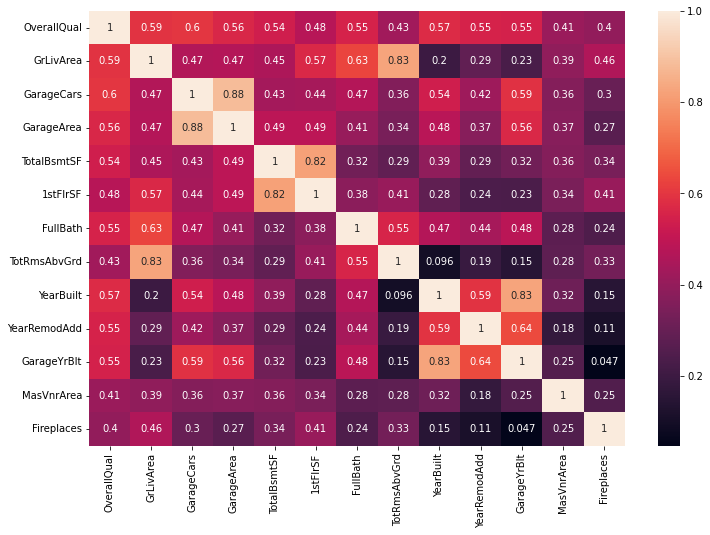

In [15]:
corr_cols = corr.loc[corr["SalePrice"] > .46, "SalePrice"].sort_values(ascending=False).index.drop("SalePrice")
corr2 = df_train[corr_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr2, annot=True);

* *GrLivArea* is highly correlated with *TotRmsAbvGrd*, let's discard it
* *GarageCars* is highly correlated with *GarageArea*, let's discard it
* *TotalBsmtSF* is highly correlated with *1stFlrSF*, let's discard it
* *YearBuilt* is highly correlated with *GarageYrBlt*, let's discard it

In [16]:
promising_features = corr_cols.drop(["TotRmsAbvGrd", "GarageArea", "1stFlrSF", "GarageYrBlt"]).to_list()
promising_features

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'TotalBsmtSF',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'Fireplaces']

Get our train & test dataframes back

In [17]:
X_all = df_all[promising_features]
X_train = X_all[:df_train.shape[0]]
X_test = X_all[df_train.shape[0]:]

y_train = df_train["SalePrice"]

In [18]:
df_all.shape, df_train.shape, df_test.shape

((2919, 80), (1460, 81), (1459, 80))

Do a sequential feature selection to find the best features to use among those 11

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from mlxtend.feature_selection import SequentialFeatureSelector

pipe = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=0))

cv = KFold(n_splits=5, shuffle=False)

sfs = SequentialFeatureSelector(pipe, k_features=X_all.shape[1], forward=True, scoring="neg_root_mean_squared_error", verbose=0, cv=cv, n_jobs=-1)
sfs.fit(X_train, y_train)

SequentialFeatureSelector(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                          estimator=Pipeline(steps=[('standardscaler',
                                                     StandardScaler()),
                                                    ('randomforestregressor',
                                                     RandomForestRegressor(random_state=0))]),
                          k_features=9, n_jobs=-1,
                          scoring='neg_root_mean_squared_error')

In [20]:
for i in sfs.subsets_:
    print(f'Subset {i}: {sfs.subsets_[i]["avg_score"]:.4f}')

Subset 1: -44948.8575
Subset 2: -41469.9771
Subset 3: -39214.5666
Subset 4: -34655.1387
Subset 5: -32178.6367
Subset 6: -31410.1448
Subset 7: -31167.3191
Subset 8: -31118.1120
Subset 9: -31455.2390


Subset 8 seems to yield the best results (lowest RMSE)

In [21]:
features = list(sfs.subsets_[8].get("feature_names"))
features

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'TotalBsmtSF',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd',
 'Fireplaces']

In [22]:
set(promising_features) - set(features)

{'MasVnrArea'}

*MasVnrArea* has been dropped

## Modeling <a name="modeling"><a/>

In [23]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import ElasticNet, Lasso, Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [24]:
X = X_train[features]
y = y_train

models = [LinearRegression(), Ridge(), ElasticNet(), RandomForestRegressor(), GradientBoostingRegressor(), Lasso(), LGBMRegressor()]
rmses, maes, r2s = [], [], []
for model in models:
    pipe = make_pipeline(StandardScaler(), model)
    
    y_preds = cross_val_predict(pipe, X, y, cv=cv, n_jobs=-1)
    
    rmse = np.sqrt(mean_squared_error(y_train, y_preds))
    mae = mean_absolute_error(y_train, y_preds)
    r2 = r2_score(y_train, y_preds)
    
    rmses.append(rmse)
    maes.append(mae)
    r2s.append(r2)
    
pd.DataFrame({"RMSE": rmses,"MAE": maes,"R2": r2s}, index=models).sort_values(by="R2", ascending=False)

,RMSE,MAE,R2
GradientBoostingRegressor(),29624.340806,18913.037968,0.860848
LGBMRegressor(),31889.092649,19930.468333,0.838759
RandomForestRegressor(),31965.517285,19578.447181,0.837985
Ridge(),38528.334555,24235.186817,0.764629
Lasso(),38531.024919,24237.375653,0.764597
LinearRegression(),38531.095437,24237.404145,0.764596
ElasticNet(),39574.429569,24256.097336,0.751675


According to RMSE, MAE et R2 scores, GradientBoostingRegressor() seems to be the best regressor here. Let's see if we can tune its parameters.

## Hyperparameters tuning <a name="hyperparameters_tuning"><a/>

### Using RandomizedSearchCV

In [25]:
# from sklearn.model_selection import RandomizedSearchCV

# parameters = {
#     "gradientboostingregressor__learning_rate": [1, 0.5, 0.25, 0.1, 0.05, 0.01],
#     "gradientboostingregressor__n_estimators": [1, 2, 4, 8, 16, 32, 64, 100, 200, 500],
#     "gradientboostingregressor__max_depth": np.arange(1, 33),
# }

# pipe = make_pipeline(StandardScaler(), GradientBoostingRegressor())
# rand_grid = RandomizedSearchCV(pipe, parameters, n_iter=300, scoring="r2", n_jobs=-1, cv=3, verbose=1)
# rand_grid.fit(X_train, y_train)

# print()
# print(f"Best parameters: {rand_grid.best_params_}")
# print(f"Best parameters: {rand_grid.best_score_:.4f}")

GridSearchCV did yield better results than the default parameters.  
Let's now use GridSearchCV to see if we can improve the results.

### Using GridSearchCV

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
# parameters = {
#     "gradientboostingregressor__learning_rate": [0.001, 0.05, 0.01, 0.015, 0.02],
#     "gradientboostingregressor__n_estimators": [480, 490, 500, 510, 520],
#     "gradientboostingregressor__max_depth": [1, 2, 3, 4, 5],
# }

# grid = GridSearchCV(pipe, parameters, scoring="r2", n_jobs=-1, cv=3, verbose=1)
# grid.fit(X_train, y_train)

# print()
# print(f"Best parameters: {grid.best_params_}")
# print(f"Best parameters: {grid.best_score_:.4f}")

Hyperparameters tuning did not yield results than the default parameters (r2 = 0.861351). Let's keep the default parameters for submission.

## Final predictions & submission <a name="submission"><a/>

In [28]:
pipe = make_pipeline(StandardScaler(), GradientBoostingRegressor())

pipe.fit(X_train, y_train)
y_preds = pipe.predict(X_test)
y_preds

array([119738.80459101, 140109.9423177 , 168174.02756714, ...,
       158780.0691993 , 117481.07294146, 243511.142133  ])

In [29]:
predictions = pd.DataFrame({"Id": df_test["Id"], "SalePrice": y_preds})
predictions

,Id,SalePrice
0,1461,119738.804591
1,1462,140109.942318
2,1463,168174.027567
3,1464,182600.991314
4,1465,201290.373979
...,...,...
1454,2915,81129.200326
1455,2916,90304.427759
1456,2917,158780.069199
1457,2918,117481.072941


In [30]:
predictions.to_csv("output.csv", index=False)